In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import sympy as sp
from sympy.abc import x
from sympy import init_printing
init_printing() 

In [2]:
np.random.seed(42)

def noised_function(x):
    return 0.2*x**2 - 3*x + 12 + np.random.normal(0,0.5)

5.0 1.9308678494144076
5.5 2.3115149282040135
6.0 1.082931521525409
6.5 1.3337173645764555
7.0 1.071280021792983
7.5 0.5171351232148715
8.0 -0.15664012232889823
8.5 0.6688562353795147
9.0 1.3571236662976363
9.5 0.843848149332355
10.0 1.887111849756732
10.5 1.8376259068932723
11.0 3.255461294854936
11.5 4.137849009172839
12.0 4.654153125103362


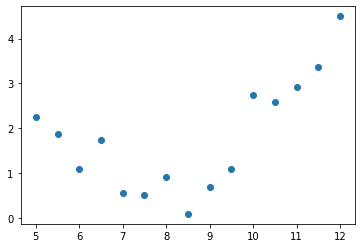

In [3]:
from matplotlib import pyplot as plt

xs = []
ys = []

for x in np.linspace(5, 12, 15):
    xs.append(x)
    ys.append(noised_function(x))
    print(x, noised_function(x))

plt.scatter(xs,ys)

In [4]:
xs, ys = np.array(xs), np.array(ys)
xs = np.reshape(xs, (-1,1))

[ 0.21701854 -3.36935118 13.74347311]


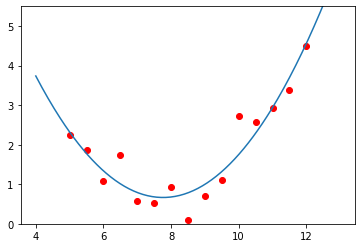

In [15]:
degree = 2
poly = PolynomialFeatures(degree, include_bias=False)
xs_poly = poly.fit_transform(xs)

regressor = LinearRegression()
regressor.fit(xs_poly, ys)
coef = regressor.coef_[::-1]
coef = np.append(coef, regressor.intercept_)
print(coef)
#print(sp.Poly(coef, x).as_expr())

test_xs = np.reshape(np.linspace(4, 13, 200), (-1,1))
test_xs_poly = poly.fit_transform(test_xs)
test_ys = regressor.predict(test_xs_poly)

plt.ylim(ymin=0, ymax=ys.max()+1)
plt.scatter(xs, ys, color='red')
plt.plot(test_xs, test_ys)
plt.show()

Degree 1


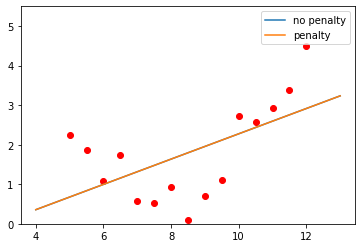

Degree 2


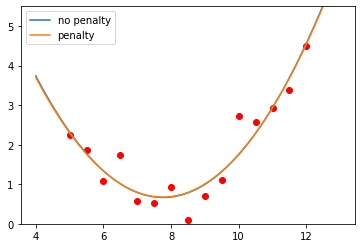

Degree 3


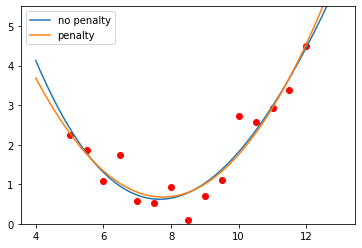

Degree 4


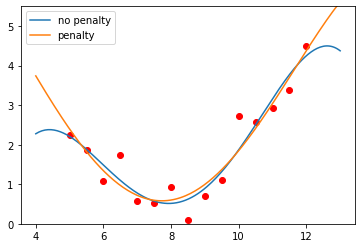

Degree 5


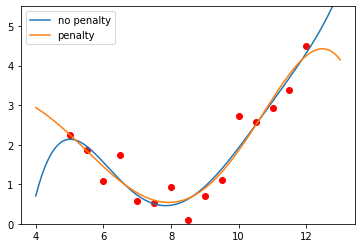

Degree 6


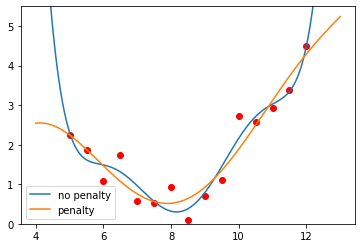

Degree 7


C:\Users\alezi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.21301e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


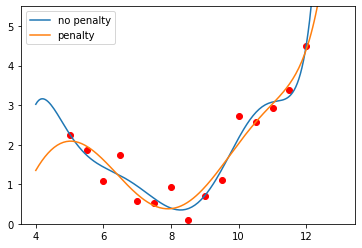

Degree 8


C:\Users\alezi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.26453e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


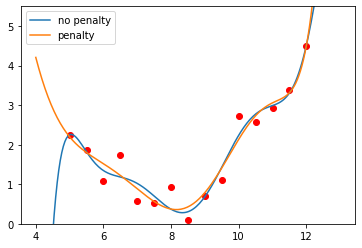

Degree 9


C:\Users\alezi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.05196e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


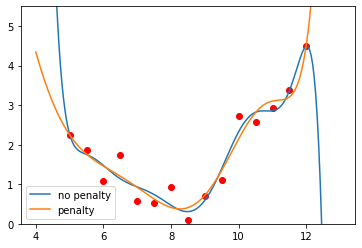

In [18]:
for i in range(1, 10):
    print('Degree', i)
    poly = PolynomialFeatures(i, include_bias=False)
    xs_poly = poly.fit_transform(xs)
    test_xs = np.reshape(np.linspace(4, 13, 200), (-1,1))
    test_xs_poly = poly.fit_transform(test_xs)
    #print(xs.shape, xs_poly.shape)

    regressor1 = LinearRegression()
    regressor2 = Ridge(alpha=0.01)
    
    regressor1.fit(xs_poly, ys)
    test_ys1 = regressor1.predict(test_xs_poly)
    
    regressor2.fit(xs_poly, ys)
    test_ys2 = regressor2.predict(test_xs_poly)
    
    plt.ylim(ymin=0, ymax=ys.max()+1)
    plt.scatter(xs, ys, color='red')
    plt.plot(test_xs, test_ys1, label='no penalty')
    plt.plot(test_xs, test_ys2, label='penalty')
    plt.legend()
    plt.show()

## House price prediction


In [27]:
data = load_boston()
X, y = data['data'], data['target']

degree = 3
poly = PolynomialFeatures(degree, include_bias=False)
print(X.shape)
X = poly.fit_transform(X)
print(X.shape)
X = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=12, shuffle=True)
print(poly.get_feature_names())

(506, 13)
(506, 559)
['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0^2 x3', 'x0^2 x4', 

In [28]:
print(X_train.shape)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)
print('r2',r2_score(y_test, predicted))
print('r2',r2_score(y_train, regressor.predict(X_train)))
coefs = np.array(regressor.coef_)
print(coefs.min(), coefs.max(), coefs.mean())
print(coefs)

(328, 559)
r2 -21.222281418661268
r2 1.0
-3851.996192704723 4141.2035284904805 0.6620941015729863
[-1.85549969e+02  2.16898012e+01 -8.46442650e+02 -3.28357918e+00
  2.78646868e+02  4.36466378e+01  1.48494293e+03 -1.38740519e+03
  2.58058246e+02  1.54061902e+01  3.13867421e+02  2.61890862e+03
  1.40694447e+03  5.84930709e+02  5.47702730e+02 -6.88862525e+02
  1.12084921e+01 -3.27294959e+02  1.50120415e+02 -6.00958607e+02
 -1.05448951e+03 -8.24416401e+02 -4.46250503e+02  5.08339758e+02
  1.43900771e+03  1.73986959e+03 -2.11900414e+02  1.97943448e+02
  1.64846401e+00  1.65212833e+02  5.11032152e+02  4.04795600e+02
 -3.49690231e+02  8.75381480e+02 -1.60608781e+03  2.80887800e+02
  1.84442442e+02  1.26571944e+03  1.06242810e+03  7.13494462e+00
  1.37047484e+03 -2.44783147e+03 -5.66046183e+01  2.15086976e+03
 -5.28485866e+02 -1.08458138e+03  3.48485214e+02 -1.66541240e+02
  9.19351164e+02 -1.79436558e+00 -8.48177647e+00 -9.19685122e+00
  4.90029334e+01  1.71296872e+01 -2.51841422e+00 -1.92649

In [31]:
print(X_train.shape)
regressor = Ridge(alpha=0.08, random_state=12)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)
print('r2',r2_score(y_test, predicted))
print('r2',r2_score(y_train, regressor.predict(X_train)))
coefs = np.array(regressor.coef_)
print(coefs.min(), coefs.max(), coefs.mean())
coefs

(328, 559)
r2 0.8398298046790881
r2 0.9490245120050329
-12.327811949808797 16.006193697248673 0.005497290565131292


array([-9.57121634e-01, -3.94002199e+00, -4.68269637e+00, -5.68994942e-01,
       -1.20262921e+00,  6.43287238e+00,  4.64932113e+00, -5.31792765e+00,
        5.62273394e+00, -3.23950522e+00,  6.84845965e-01,  6.81103365e+00,
        2.05009555e+00,  2.25492824e-01, -1.09739914e+00, -5.71534748e-01,
        2.69951151e+00, -4.50334319e-01, -4.15356684e-01, -7.43713087e-01,
       -1.25823504e+00, -8.35817311e-01, -7.77623567e-01, -9.25074957e-01,
        7.98167090e-01, -3.08237603e-02, -5.93945068e-01, -1.97170711e+00,
        2.21891247e-01, -2.15663447e+00,  8.61290770e-01, -5.55072100e-01,
       -2.54801839e+00, -1.64406178e+00, -7.76017483e-01, -8.26473246e-01,
       -2.92971287e+00, -2.17991342e+00,  8.79231833e-02, -4.18978677e-01,
       -2.98181470e-01, -1.97421755e+00, -6.12638353e-01, -5.21343361e+00,
        3.51131851e+00,  2.47376815e+00, -3.13446806e+00,  6.81998779e-01,
       -3.95797223e+00, -5.68994942e-01, -1.18598941e+00, -6.46429708e-01,
       -5.80423005e-01,  